Thomas Dagier, Quentin Rod

# Practical work 08 - Clustering

## Imports

In [1]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [2]:
# Your code here
data1, label1 = pickle.load(open("dataset_1.pkl", "rb"), encoding ="latin1")
data2, label2 = pickle.load(open("dataset_2.pkl", "rb"), encoding ="latin1")

b) Visualize the data using various color for each unique labels

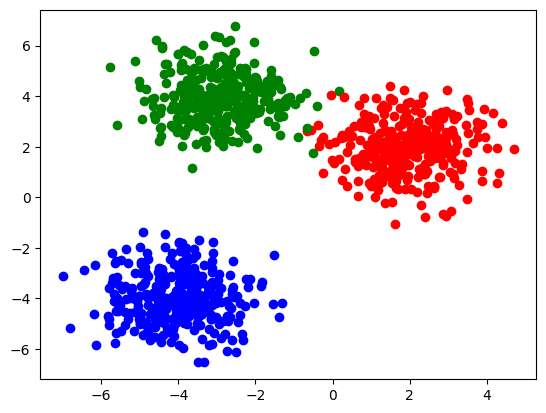

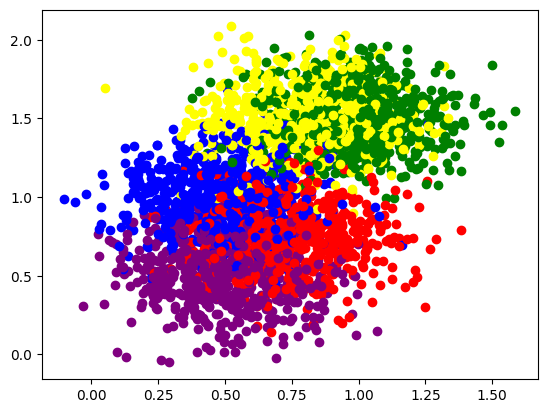

In [3]:
# Your code here
def visualize(data, label):
    colors = {0:'red',1:'green',2:'blue', 3:'yellow', 4:'purple'}
    for i in range(len(data)):
        plt.scatter(data[i][0], data[i][1], color = colors.get(label[i], 'black'))
    plt.show()

visualize(data1, label1)
visualize(data2, label2)
# est-ce qu'on doit aussi montrer les 3 barycentres ???

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [4]:
# Your code here
def init_centroids(data, k):
    centroids = []
    for i in range(k):
        centroids.append(data[np.random.randint(len(data))])
    return centroids

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span>

In [5]:
# Your code here
def euclidian_distance(a, b):
    return np.linalg.norm(a[0] - b[0]) + np.linalg.norm(a[1] - b[1])

def assign_closest_centroid(data, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in data:
        distances = []
        for i in range(len(clusters)):
            distances.append(euclidian_distance(point, centroids[i]))
        clusters[distances.index(min(distances))].append(point)
    return clusters

<span style="margin-left: 20px;">ii) Reevaluate the centroids</span>

In [6]:
# Your code here
def reevaluate_centroids(clusters):
    centroids = []
    for i in range(len(clusters)):
        centroids.append(np.average(clusters[i], axis=0))
    return centroids

c) Return the $k$ centroids.

In [7]:
# Your code here
#def kmeans(data, k, epochs, threshold):
#    centroids = init_centroids(data, k)
#    for i in range(epochs):
#        clusters = assign_closest_centroid(data, centroids)
#        new_centroids = reevaluate_centroids(clusters)
#        # peut être revoir la condition de convergence
#        if np.allclose(centroids, new_centroids, atol=threshold):
#            break
#        centroids = new_centroids
#    return centroids, clusters, i

# Your code here
def kmeans(data, k, epsilon):
    j_history = []
    centroids = init_centroids(data, k)
    while True: 
        clusters = assign_closest_centroid(data, centroids)
        j_history.append(compute_j(clusters, centroids))
        if len(j_history) > 1 :
            if (j_history[len(j_history)-2] - j_history[len(j_history)-1]) / j_history[len(j_history)-1] < epsilon:
                break    
        centroids = reevaluate_centroids(clusters)
    return centroids, clusters, j_history

def compute_j(clusters, centroids) :
    j_temp = 0
    for i in range(len(clusters)):
        for point in clusters[i]:
            j_temp += euclidian_distance(point, centroids[i])**2
    return j_temp

We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [8]:
# Your code here
nb_centroids = 3
centroids, clusters, j_history = kmeans(data1, nb_centroids, 0.000001)

Visualize your convergence criteria over the epochs using the dataset 1.

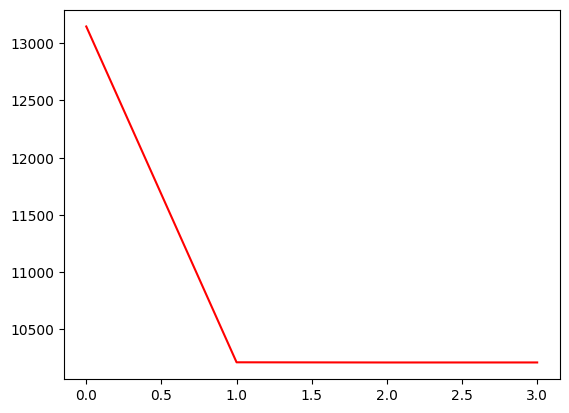

In [9]:
# Your code here
plt.plot(np.arange(0, len(j_history), 1), j_history, 'r')
plt.show()

Visualize the output of your $k$-means on the dataset 1.

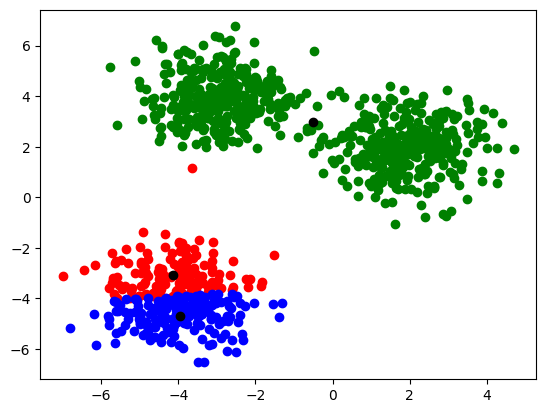

In [10]:
# Your code here
def visualize_kmeans(clusters, centroids):
    colors = {0:'red',1:'green',2:'blue', 3:'yellow', 4:'purple'}
    for i in range(len(clusters)):
        for point in clusters[i]:
            plt.scatter(point[0], point[1], color = colors.get(i, 'black'))
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], color = 'black')
    plt.show()

visualize_kmeans(clusters, centroids)

Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?

We don't experience sensitivity to the initial values of the centroids although they are randomly chosen. This strategy works in all our tests

Document your convergence criteria. Could you think about other convergence criteria?

The algorithm converges really fast. This is explain by the fact that our centroids don't change anymore. So, when we compute the new value of J, it doesn't change too. As the algorithm mathematically converges, we are sure to minimize the distortion. 
An other idea for the criteria would be to check for each point if they changed their centroids or not and use a treshold to check for a maximum amount of point that did change.

Run your algorithm with the dataset 2.

In [11]:
# Your code here
nb_centroids = 5
centroids, clusters, j_history = kmeans(data2, nb_centroids, 0.000001)

Visualize your convergence criteria over time using the dataset 2.

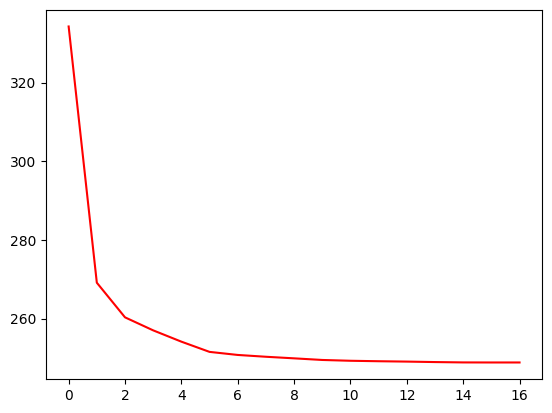

In [12]:
# Your code here
plt.plot(np.arange(0, len(j_history), 1), j_history, 'r')
plt.show()

Visualize the output of your $k$-means on the dataset 2 and comment your results.

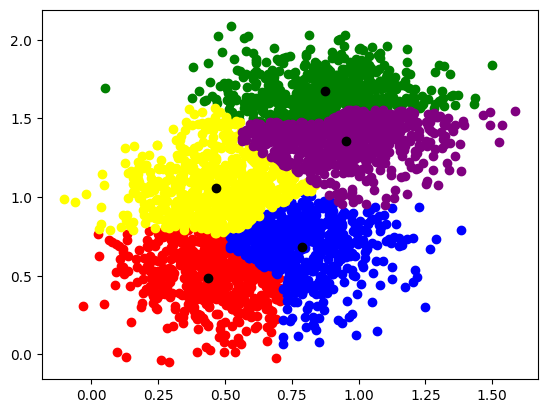

In [13]:
# Your code here
visualize_kmeans(clusters, centroids)

Just like the first dataset, with random initial centroid values, clusters are very slightly different over several tests. It's the case even if we cannot visually distinguish clusters unlike the first dataset.